# Trabajo Practico Integrador - Modulo 2

WORKSHOP 2

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn import metrics
from sklearn import datasets
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tools import eval_measures
from sklearn import linear_model

In [307]:
#Importamos el DAtaset que limpiamos para le Workshop anterior
dataset = pd.read_csv('DataSet_limpio.csv')

In [308]:

#Del ultimo dataset obtenido, reducimos a CABA

data_caba= dataset.loc[dataset.Provincia == 'Capital Federal']
data_caba

,Unnamed: 0,Index,Propiedad,Barrio,Ubicacion,Pais,Provincia,ID_GeoName,Latitud_Longitud,Latitud,...,M2_descrip,grupo_M2,rango_M2,Precio_USD_mediagrupo,precio_final,grupo_Precios,rango_precios,M2_mediagrupo,M2_final,Precio_final_M2_USD
0,0,0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,NaN,grupo 7,"(54.0, 60.0]",94954.545455,62000.0,grupo M2 2,"(53200.0, 65000.0]",37.166667,55.0,1127.27
2,2,2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,NaN,grupo 7,"(54.0, 60.0]",102250.000000,72000.0,grupo M2 3,"(65000.0, 74900.0]",48.285714,55.0,1309.09
3,3,3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,95000.0,grupo M2 6,"(89734.0, 98000.0]",60.000000,60.0,1583.33
7,7,7,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,NaN,grupo 4,"(40.0, 45.0]",139408.907975,138000.0,grupo M2 10,"(130000.0, 145000.0]",46.776224,45.0,3066.67
8,8,8,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,NaN,grupo 8,"(60.0, 66.0]",185822.179487,195000.0,grupo M2 13,"(178069.4, 200000.0]",67.481013,65.0,3000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117556,117556,121160,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563685346,-58.4426825896",-34.563685,...,NaN,grupo 15,"(155.0, 190.0]",563313.608333,410000.0,grupo M2 18,"(370000.0, 470000.0]",136.509091,157.0,2611.46
117605,117605,121209,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563685346,-58.4426825896",-34.563685,...,NaN,grupo 15,"(155.0, 190.0]",563313.608333,410000.0,grupo M2 18,"(370000.0, 470000.0]",136.509091,157.0,2611.46
117611,117611,121215,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,NaN,grupo 13,"(110.0, 130.0]",559448.333333,870000.0,grupo M2 20,"(695000.0, 19504974.0]",255.833333,113.0,7699.12
117613,117613,121217,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,...,0.0,grupo 5,"(45.0, 50.0]",122957.150000,131500.0,grupo M2 10,"(130000.0, 145000.0]",55.979592,46.0,2858.70


In [309]:

#Para reducir los datos extremos, creamos 2 mascaras: tomamos los Grupos de M2 1 y 20 (el mas chico y mas grande) y los eliminamos
#con esto evitamos tener tanto M2 de valor 1 (errores de carga), como M2 muy extremos que desvirtuen el Dataset.
mask_grupo1= data_caba.grupo_M2 == 'grupo 1'
mask_grupo20= data_caba.grupo_M2 == 'grupo 20'
#Analizamos los valores con las nuevas mascaras para ver si precisamos mas cambios
cabamedia = data_caba[(~mask_grupo1) & (~mask_grupo20)].groupby('Barrio_2')['Precio_final_M2_USD'].mean().to_frame()
cabamedia.sort_values('Precio_final_M2_USD',ascending=False,inplace=True)
cabamedia.head(10)

,Precio_final_M2_USD
Barrio_2,
Villa Soldati,15700.846429
San Cristobal,8830.650069
Boedo,8576.793474
Puerto Madero,6079.539683
Las Cañitas,3524.082206
Palermo,3381.639115
Recoleta,3333.798467
Nuñez,3161.798592
Belgrano,3133.421550


In [310]:
data_caba_filtrogrupos = data_caba[(~mask_grupo1) & (~mask_grupo20)]
mask_notnull=data_caba_filtrogrupos.Precio_final_M2_USD.notnull()
data_caba_filtrogrupos=data_caba_filtrogrupos[mask_notnull]

In [311]:
#Vemos que el Dataset resultante sigue dando diferencias considerables con lo que se supone debe ser la realidad, las cuales analizamos.

In [312]:
#Analizamos el problema que puede surgir con Soldati
data_caba_filtrogrupos.loc[data_caba_filtrogrupos.Barrio_2=='Villa Soldati']

,Unnamed: 0,Index,Propiedad,Barrio,Ubicacion,Pais,Provincia,ID_GeoName,Latitud_Longitud,Latitud,...,M2_descrip,grupo_M2,rango_M2,Precio_USD_mediagrupo,precio_final,grupo_Precios,rango_precios,M2_mediagrupo,M2_final,Precio_final_M2_USD
10426,10426,10857,apartment,Villa Soldati,|Argentina|Capital Federal|Villa Soldati|,Argentina,Capital Federal,3427366.0,"-34.6665464,-58.473611",-34.666546,...,50.0,grupo 5,"(45.0, 50.0]",62500.0,86000.0,grupo M2 5,"(81544.4, 89734.0]",50.0,50.0,1720.00
18040,18040,18761,apartment,Villa Soldati,|Argentina|Capital Federal|Villa Soldati|,Argentina,Capital Federal,3427366.0,"-34.665052,-58.443081",-34.665052,...,NaN,grupo 7,"(54.0, 60.0]",55523.0,55523.0,grupo M2 2,"(53200.0, 65000.0]",60.0,60.0,925.38
28978,28978,30105,PH,Villa Soldati,|Argentina|Capital Federal|Villa Soldati|,Argentina,Capital Federal,3427366.0,"-34.66244,-58.448424",-34.662440,...,NaN,grupo 10,"(74.0, 82.0]",95000.0,95000.0,grupo M2 6,"(89734.0, 98000.0]",78.0,78.0,1217.95
29310,29310,30458,PH,Villa Soldati,|Argentina|Capital Federal|Villa Soldati|,Argentina,Capital Federal,3427366.0,"-34.6629128,-58.4439783",-34.662913,...,138.0,grupo 14,"(130.0, 155.0]",100000.0,100000.0,grupo M2 7,"(98000.0, 110000.0]",138.0,138.0,724.64
29621,29621,30781,house,Villa Soldati,|Argentina|Capital Federal|Villa Soldati|,Argentina,Capital Federal,3427366.0,"-34.6609488,-58.4445291",-34.660949,...,425.0,grupo 19,"(365.0, 600.0]",240000.0,240000.0,grupo M2 15,"(230000.0, 265000.0]",595.0,595.0,403.36
35572,35572,36977,apartment,Villa Soldati,|Argentina|Capital Federal|Villa Soldati|,Argentina,Capital Federal,3427366.0,"-34.6654885,-58.4388808",-34.665489,...,88.0,grupo 11,"(82.0, 95.0]",69000.0,69000.0,grupo M2 3,"(65000.0, 74900.0]",73.5,88.0,784.09
35576,35576,36981,apartment,Villa Soldati,|Argentina|Capital Federal|Villa Soldati|,Argentina,Capital Federal,3427366.0,"-34.6654885,-58.4388808",-34.665489,...,88.0,grupo 11,"(82.0, 95.0]",69000.0,69000.0,grupo M2 3,"(65000.0, 74900.0]",73.5,88.0,784.09
48959,48959,50860,apartment,Villa Soldati,|Argentina|Capital Federal|Villa Soldati|,Argentina,Capital Federal,3427366.0,"-34.667453,-58.444583",-34.667453,...,NaN,grupo 10,"(74.0, 82.0]",48000.0,48000.0,grupo M2 1,"(-0.001, 53200.0]",64.5,80.0,600.00
51721,51721,53742,house,Villa Soldati,|Argentina|Capital Federal|Villa Soldati|,Argentina,Capital Federal,3427366.0,"-34.663247,-58.441418",-34.663247,...,NaN,grupo 14,"(130.0, 155.0]",127000.0,127000.0,grupo M2 9,"(120000.0, 130000.0]",145.0,145.0,875.86
54466,54466,56554,apartment,Villa Soldati,|Argentina|Capital Federal|Villa Soldati|,Argentina,Capital Federal,3427366.0,"-34.662299,-58.468263",-34.662299,...,NaN,grupo 7,"(54.0, 60.0]",73000.0,74000.0,grupo M2 3,"(65000.0, 74900.0]",73.5,58.0,1275.86


In [313]:
#Vemos que hay un problema con Soldati, donde una STORE posee un Valor por Metro cuadrado de mas de 200.000 USD. Esto claramente es un error de Carga.

In [314]:
data_caba_filtrogrupos.loc[data_caba_filtrogrupos.Barrio_2=='Boedo'].sort_values('Precio_final_M2_USD',ascending=False)

,Unnamed: 0,Index,Propiedad,Barrio,Ubicacion,Pais,Provincia,ID_GeoName,Latitud_Longitud,Latitud,...,M2_descrip,grupo_M2,rango_M2,Precio_USD_mediagrupo,precio_final,grupo_Precios,rango_precios,M2_mediagrupo,M2_final,Precio_final_M2_USD
25632,25632,26637,apartment,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,3436003.0,"-34.6222039,-58.416089",-34.622204,...,NaN,grupo 2,"(30.0, 36.0]",432350.833333,6810737.0,grupo M2 20,"(695000.0, 19504974.0]",34.753086,33.0,206385.97
25189,25189,26193,apartment,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,3436003.0,NaN,NaN,...,NaN,grupo 2,"(30.0, 36.0]",432350.833333,3657947.0,grupo M2 20,"(695000.0, 19504974.0]",34.753086,35.0,104512.77
24121,24121,25113,apartment,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,3436003.0,"-34.6266572,-58.4241126",-34.626657,...,NaN,grupo 7,"(54.0, 60.0]",226316.705882,2003511.0,grupo M2 20,"(695000.0, 19504974.0]",34.753086,58.0,34543.29
24020,24020,25012,apartment,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,3436003.0,"-34.6228372,-58.4205095",-34.622837,...,38.0,grupo 3,"(36.0, 40.0]",675328.078431,1202307.0,grupo M2 20,"(695000.0, 19504974.0]",34.753086,37.0,32494.78
25601,25601,26606,apartment,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,3436003.0,"-34.6222039,-58.416089",-34.622204,...,NaN,grupo 2,"(30.0, 36.0]",432350.833333,780000.0,grupo M2 20,"(695000.0, 19504974.0]",34.753086,32.0,24375.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49436,49436,51343,PH,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,3436003.0,"-34.6415327,-58.4203429",-34.641533,...,12.0,grupo 12,"(95.0, 110.0]",113500.000000,95000.0,grupo M2 6,"(89734.0, 98000.0]",101.000000,101.0,940.59
86511,86511,89330,apartment,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,3436003.0,"-34.6288439,-58.4222833",-34.628844,...,NaN,grupo 17,"(228.0, 280.0]",346250.000000,250000.0,grupo M2 15,"(230000.0, 265000.0]",182.250000,271.0,922.51
17807,17807,18524,house,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,3436003.0,"-34.6223456,-58.4229163",-34.622346,...,NaN,grupo 18,"(280.0, 365.0]",310000.000000,300000.0,grupo M2 16,"(265000.0, 310000.0]",146.666667,330.0,909.09
24199,24199,25192,house,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,3436003.0,"-34.6342606,-58.4178509",-34.634261,...,NaN,grupo 19,"(365.0, 600.0]",714061.200000,370000.0,grupo M2 17,"(310000.0, 370000.0]",243.333333,420.0,880.95


In [315]:
#boedo presenta muchas localidades con este tipo de carga de $/M2 Altos

In [316]:
#data_caba_filtrogrupos=data_caba_filtrogrupos.drop([25632,25189],axis=0)

In [317]:
data_caba_filtrogrupos.Precio_final_M2_USD.mean(),data_caba_filtrogrupos.Precio_final_M2_USD.std()

(2896.5188073238673, 3013.362057534096)

In [318]:
import seaborn as sns #Libreria Seaborn 


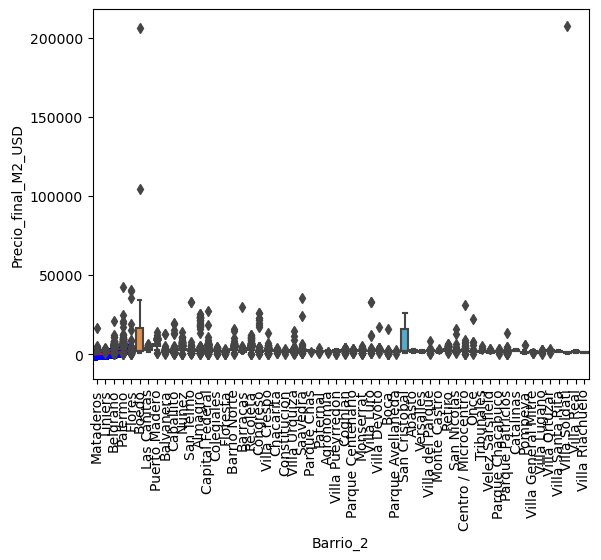

In [319]:
#Buscamos ver si los outliers eran facilmente localizables, lo que descubrimos en un primer momento
sns.boxplot(x='Barrio_2',y='Precio_final_M2_USD',data=data_caba_filtrogrupos)

plt.xticks(rotation=90)
plt.show()

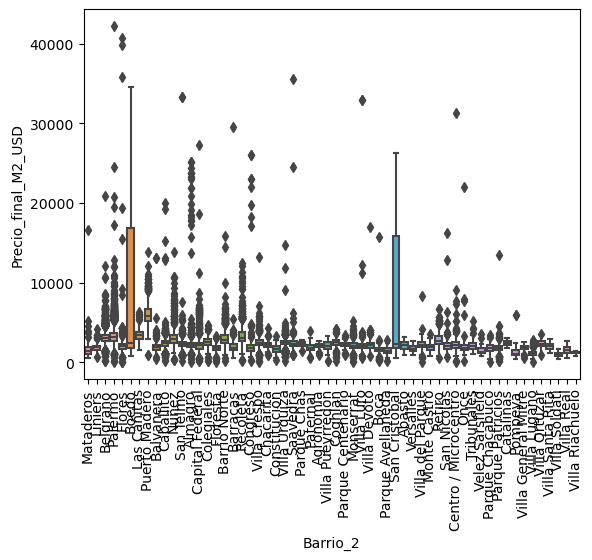

<Figure size 2500x5800 with 0 Axes>

In [320]:
#Vimos que Debajo de 50.000 empezaron a aparecer los primeros outliers fuertes, por lo que quisimos comprobar que pasaba con el grafico si los eliminiabamos, para tener un mejor panorama
sns.boxplot(x='Barrio_2',y='Precio_final_M2_USD',data=data_caba_filtrogrupos[data_caba_filtrogrupos.Precio_final_M2_USD<50000])

plt.xticks(rotation=90)
plt.figure(figsize=(25,58))
plt.show()

In [321]:
#se observan fuertes otuliers tanto en Boedo como en Sancristobal, pero en General por arriba de los 10.000 se encuentran muchos outliers. Seguimos realizando filtros.

In [322]:
cabamedia = data_caba_filtrogrupos[data_caba_filtrogrupos.Precio_final_M2_USD<50000].groupby('Barrio_2')['Precio_final_M2_USD'].mean().to_frame()
cabamedia.sort_values('Precio_final_M2_USD',ascending=False,inplace=True)
cabamedia.head(10)

,Precio_final_M2_USD
Barrio_2,
San Cristobal,8830.650069
Boedo,7844.261920
Puerto Madero,6079.539683
Las Cañitas,3524.082206
Palermo,3381.639115
Recoleta,3333.798467
Nuñez,3161.798592
Belgrano,3133.421550
Barrio Norte,3055.747065


In [323]:
#Hicimos algunas mascaras mas para reforzar el analisis.
#entendemos que ningun barrio puede estar por encima de Puerto Madero, por lo que filtramos Boedo Y San Cristobal
mask_boedo= (data_caba_filtrogrupos.Barrio_2=='Boedo')& (data_caba_filtrogrupos.Precio_final_M2_USD>5000)
mask_Cristobal= (data_caba_filtrogrupos.Barrio_2=='San Cristobal')& (data_caba_filtrogrupos.Precio_final_M2_USD>5000)
mask_20000 = (data_caba_filtrogrupos.Precio_final_M2_USD>10000)
mask_300 = (data_caba_filtrogrupos.Precio_final_M2_USD<200)

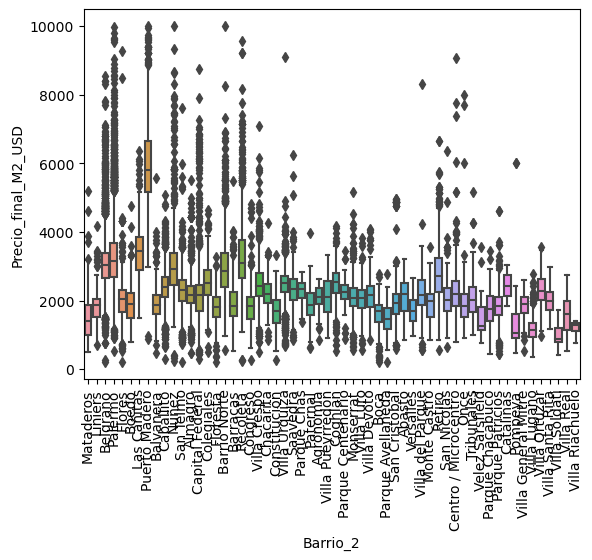

<Figure size 2500x5800 with 0 Axes>

In [324]:
sns.boxplot(x='Barrio_2',y='Precio_final_M2_USD',data=data_caba_filtrogrupos[(~mask_boedo)&(~mask_Cristobal)&(~mask_20000) &(~mask_300)])

plt.xticks(rotation=90)
plt.figure(figsize=(25,58))
plt.show()

In [325]:
# En la figura logramos aprecias que salvo por Puerto MAdero, que tendra un tratamiento especial, el Resto de los Barrios tiende a ubicarse netre los 1.500 y los 3.500


In [326]:
data_limpia=data_caba_filtrogrupos[(~mask_boedo)&(~mask_Cristobal)&(~mask_20000)&(~mask_300) ]


In [327]:
cabamedia_limpia = data_limpia.groupby('Barrio_2')['Precio_final_M2_USD'].mean().to_frame()
cabamedia_limpia['mediana'] = data_limpia.groupby('Barrio_2')['Precio_final_M2_USD'].median()
cabamedia_limpia['std'] = data_limpia.groupby('Barrio_2')['Precio_final_M2_USD'].std()
cabamedia_limpia['max'] = data_limpia.groupby('Barrio_2')['Precio_final_M2_USD'].max()
cabamedia_limpia['min'] = data_limpia.groupby('Barrio_2')['Precio_final_M2_USD'].min()
cabamedia_limpia['cantidad'] = data_limpia.groupby('Barrio_2')['Precio_final_M2_USD'].count()
cabamedia_limpia['tope_sup'] = cabamedia_limpia['std']*2+cabamedia_limpia['mediana']
cabamedia_limpia.sort_values('tope_sup',ascending=False,inplace=True)
cabamedia_limpia.head()


,Precio_final_M2_USD,mediana,std,max,min,cantidad,tope_sup
Barrio_2,,,,,,,
Puerto Madero,5986.845437,5790.950,1302.643543,10000.00,875.00,618,8396.237086
Palermo,3341.782883,3150.160,1084.029636,9969.21,526.32,3850,5318.219271
Nuñez,3117.884709,2908.260,1179.245296,10000.00,250.00,756,5266.750593
Las Cañitas,3524.082206,3432.305,912.902669,6370.97,1491.02,136,5258.110338
Recoleta,3292.803983,3105.260,1005.913689,9567.66,248.82,1426,5117.087378


In [328]:
#Realizamos una nueva muestra, en la que colocamos como tope superior de precio por metro cuadrado pada cada Barrio su media y 2 Desvios Standard.

In [329]:
#Buscamos entender la Media de los Topes superiores
cabamedia_limpia.tope_sup.describe()

count      58.000000
mean     3431.354608
std      1052.170058
min      1564.787439
25%      2846.013736
50%      3204.150726
75%      3548.832198
max      8396.237086
Name: tope_sup, dtype: float64

In [330]:
#HAcmos una mascara final, con un tope superio de 4.000, un valor por encima de la media, para todos menos para Puerto Madero
mask_final= (data_limpia.Barrio_2!='Puerto Madero')& (data_limpia.Precio_final_M2_USD>4000)
data_limpia_final=data_limpia[(~mask_final)]

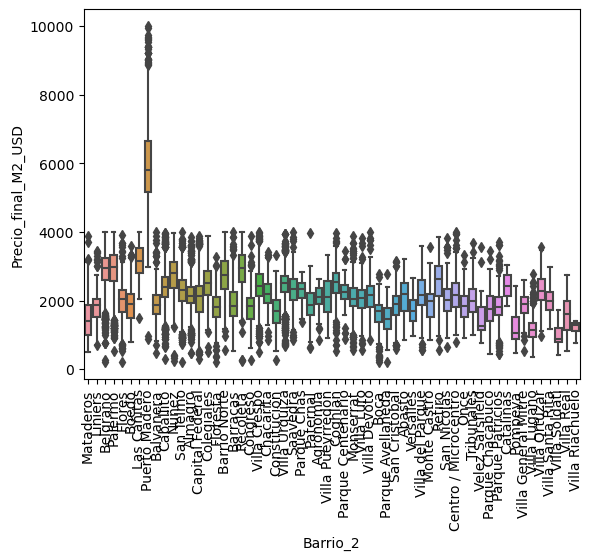

<Figure size 2500x5800 with 0 Axes>

In [331]:
sns.boxplot(x='Barrio_2',y='Precio_final_M2_USD',data=data_limpia_final)

plt.xticks(rotation=90)
plt.figure(figsize=(25,58))
plt.show()

In [332]:
cabamedia = data_limpia_final.groupby('Barrio_2')['Precio_final_M2_USD'].mean().to_frame()
cabamedia.sort_values('Precio_final_M2_USD',ascending=False,inplace=True)
cabamedia

,Precio_final_M2_USD
Barrio_2,
Puerto Madero,5986.845437
Las Cañitas,3127.208571
Palermo,2923.705460
Recoleta,2916.891833
Belgrano,2903.566504
Barrio Norte,2752.741438
Nuñez,2729.734373
Retiro,2586.043316
Colegiales,2510.431804


In [333]:
# Comapramos los valores con los que figuran en la Web de https://mudafy.com.ar/, para corroborar que no obtengamos valores muy alejados.

In [334]:
#Separamos solo las Columnas que nos importan
data_modelos = data_limpia_final.loc[:,['Tipo_propiedad_nuevo','Barrio_2','precio_final','M2_final','Precio_final_M2_USD']]

In [335]:
#Resetamos el indice para no tener problemas de Filas
data_modelos.reset_index(inplace=True)
data_modelos.drop('index',axis=1,inplace=True)
data_modelos.shape

(27064, 5)

In [336]:
data_modelos

,Tipo_propiedad_nuevo,Barrio_2,precio_final,M2_final,Precio_final_M2_USD
0,PH,Mataderos,62000.0,55.0,1127.27
1,APARTMENT,Mataderos,72000.0,55.0,1309.09
2,PH,Liniers,95000.0,60.0,1583.33
3,APARTMENT,Belgrano,138000.0,45.0,3066.67
4,APARTMENT,Belgrano,195000.0,65.0,3000.00
...,...,...,...,...,...
27059,APARTMENT,Recoleta,165000.0,44.0,3750.00
27060,APARTMENT,Belgrano,410000.0,157.0,2611.46
27061,APARTMENT,Belgrano,410000.0,157.0,2611.46
27062,APARTMENT,Villa Urquiza,131500.0,46.0,2858.70


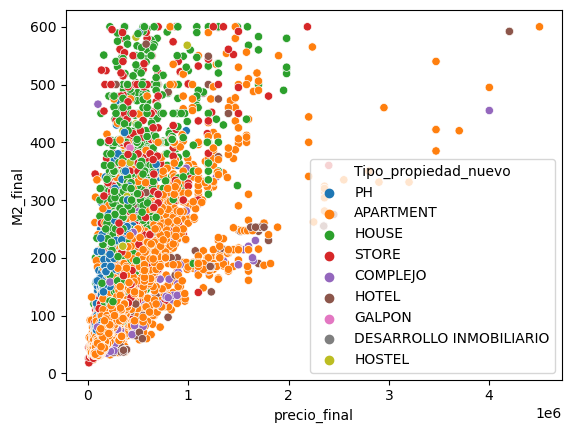

In [337]:
sns.scatterplot(data = data_modelos, x = "precio_final", y = "M2_final",hue='Tipo_propiedad_nuevo')
plt.show()

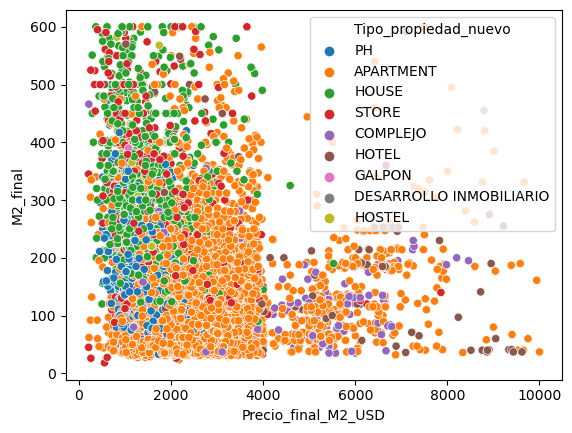

In [338]:
sns.scatterplot(data = data_modelos, x = "Precio_final_M2_USD", y = "M2_final",hue='Tipo_propiedad_nuevo')
plt.show()

In [339]:
#Nos aseguramos que no tengamos valores NaN
data_modelos.isnull().sum()

Tipo_propiedad_nuevo    0
Barrio_2                0
precio_final            0
M2_final                0
Precio_final_M2_USD     0
dtype: int64

In [340]:
data_modelos.corr()

,precio_final,M2_final,Precio_final_M2_USD
precio_final,1.000000,0.706512,0.450772
M2_final,0.706512,1.000000,-0.146674
Precio_final_M2_USD,0.450772,-0.146674,1.000000


In [341]:
#La interpretacion que hacemos sobre la correlacion de los datos, y esta Correlacion negativa entre $/M2 y M2, es que:
# si tenemos 2 casas, una casa Del doble de M2 que la otra, no Vale exactamente el Doble que esta, siendo mismo tipo y misma zona.
#en este escenario el PRecio por metro cuadrado Bajaria. Por esto creemos que tiene sentido esta correlacion negativa

In [342]:
#Ahora bien, para el modelo, tenemos que tener en cuenta las Variables Dummies. Primero realizamos la conversion de las mimas mediante OneHotEncoder, luego realizamos el modelo 
#Usarmes Stats Models
categoricals = ['Tipo_propiedad_nuevo', 'Barrio_2']
enc = OneHotEncoder(drop='first')
X = data_modelos[categoricals]
enc.fit(X)
dummies = enc.transform(X).toarray()
dummies_df = pd.DataFrame(dummies)
col_names = [categoricals[i] + '_' + enc.categories_[i] for i in range(len(categoricals)) ]
col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]
dummies_df.columns = col_names_drop_first
#Teniendo las Dummies, las concatenamos con M2_Final. Este sera nuestra X del modelo
X = pd.concat([data_modelos.M2_final,dummies_df], axis = 1)
#La variable a predecir sera el Precio Final por Metro cudrado
y = data_modelos.Precio_final_M2_USD
# TEniendo X e Y, podemos entrenar el Modelo.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 170)
X_train_sm = sm.add_constant(X_train)
#
model = sm.OLS(y_train, X_train_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Precio_final_M2_USD   R-squared:                       0.670
Model:                             OLS   Adj. R-squared:                  0.668
Method:                  Least Squares   F-statistic:                     621.1
Date:                 Tue, 31 Aug 2021   Prob (F-statistic):               0.00
Time:                         20:19:44   Log-Likelihood:            -1.5546e+05
No. Observations:                20298   AIC:                         3.110e+05
Df Residuals:                    20231   BIC:                         3.116e+05
Df Model:                           66                                         
Covariance Type:             nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         2301.9165     62.006     37.124      0.000    2180.379    2423.454
M2_final                                        -1.7346      0.053    -32.963      0.000      -1.838      -1.631
Tipo_propiedad_nuevo_COMPLEJO                  123.1123     25.261      4.874      0.000      73.598     172.626
Tipo_propiedad_nuevo_DESARROLLO INMOBILIARIO   408.9048     60.626      6.745      0.000     290.074     527.736
Tipo_propiedad_nuevo_GALPON                   -450.0682    182.703     -2.463      0.014    -808.182     -91.955
Tipo_propiedad_nuevo_HOSTEL                   -576.3831    110.345     -5.223      0.000    -792.668    -360.099
Tipo_propiedad_nuevo_HOTEL                     687.7572     47.769     14.397      0.000     594.125     781.389
Tipo_propiedad_nuevo_HOUSE                    -295.2708     20.070    -14.712      0.000    -334.609    -255.932
Tipo_propiedad_nuevo_PH                       -389.7498     16.213    -24.039      0.000    -421.529    -357.971
Tipo_propiedad_nuevo_STORE                     -41.7489     18.031     -2.315      0.021     -77.091      -6.407
Barrio_2_Agronomía                             -14.2873    111.052     -0.129      0.898    -231.958     203.384
Barrio_2_Almagro                                35.4105     64.532      0.549      0.583     -91.078     161.899
Barrio_2_Balvanera                            -242.8429     66.437     -3.655      0.000    -373.064    -112.622
Barrio_2_Barracas                             -182.4815     68.412     -2.667      0.008    -316.574     -48.389
Barrio_2_Barrio Norte                          639.2240     64.948      9.842      0.000     511.921     766.527
Barrio_2_Belgrano                              789.5944     62.961     12.541      0.000     666.185     913.004
Barrio_2_Boca                                 -502.8683     74.830     -6.720      0.000    -649.542    -356.195
Barrio_2_Boedo                                -133.1879     72.785     -1.830      0.067    -275.852       9.476
Barrio_2_Caballito                             261.2477     63.170      4.136      0.000     137.430     385.065
Barrio_2_Capital Federal                        20.1875     64.891      0.311      0.756    -107.004     147.379
Barrio_2_Catalinas                             152.5380    369.192      0.413      0.679    -571.109     876.185
Barrio_2_Centro / Microcentro                   97.3250     77.975      1.248      0.212     -55.513     250.163
Barrio_2_Chacarita                              42.1296     74.195      0.568      0.570    -103.298     187.558
Barrio_2_Coghlan                               387.8935     71.903      5.395      0.000     246.958     528.829
Barrio_2_Colegiales  

In [343]:
#El modelos nos dio muy buen R2 para el mundo real, un 0.67Aprox.
#como dato negativo, tenemos muchos coeficientes poco significativos, que trataremos de eliminar utilizando Lasso o Ridge

In [344]:
# Analizamos el RMSE entre el modelo de entrenamiento y el de Testeo, para ver si tenemos diferencias en las predicciones entre ambos
# Recordemos que el error cuadrático medio (RMSE) mide la cantidad de error que hay entre dos conjuntos de datos. 
#En otras palabras, compara un valor predicho y un valor observado.
sm_prediction_train = model.predict(X_train_sm)
print(eval_measures.rmse(y_train, sm_prediction_train))

X_test_sm = sm.add_constant(X_test)
sm_prediction_test = model.predict(X_test_sm)
print(eval_measures.rmse(y_test, sm_prediction_test))


512.7291378259362
516.9203320019327


In [345]:
# La diferencia no es significativa

In [346]:
#Rehacemos el Modelo, pero esta vez sumaremos la Normalizacion de los Datos numericos (M2), lo que facilitara la regularizacion
#REpetimos lo realizado para variables Dummies
enc = OneHotEncoder(drop='first')
X = data_modelos[categoricals]
enc.fit(X)
dummies = enc.transform(X).toarray()
dummies_df = pd.DataFrame(dummies)
col_names = [categoricals[i] + '_' + enc.categories_[i] for i in range(len(categoricals)) ]
col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]
dummies_df.columns = col_names_drop_first



#Sumamos la Normalizacion de las variables numericas
numericals = ['M2_final'
             ]
X = data_modelos[numericals]

scaler = MinMaxScaler()
scaler.fit(X)

std_numerical_data = scaler.transform(X)
std_df = pd.DataFrame(std_numerical_data)
std_df.columns = [i + '_std' for i in numericals]
#Volvemos a unir los dataset para formar X
X = pd.concat([std_df,dummies_df], axis = 1)
y = data_modelos.Precio_final_M2_USD
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 170)
X_train_sm = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Precio_final_M2_USD   R-squared:                       0.670
Model:                             OLS   Adj. R-squared:                  0.668
Method:                  Least Squares   F-statistic:                     621.1
Date:                 Tue, 31 Aug 2021   Prob (F-statistic):               0.00
Time:                         20:19:44   Log-Likelihood:            -1.5546e+05
No. Observations:                20298   AIC:                         3.110e+05
Df Residuals:                    20231   BIC:                         3.116e+05
Df Model:                           66                                         
Covariance Type:             nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         2270.3469     61.952     36.647      0.000    2148.915    2391.778
M2_final_std                                 -1009.1862     30.616    -32.963      0.000   -1069.195    -949.177
Tipo_propiedad_nuevo_COMPLEJO                  123.1123     25.261      4.874      0.000      73.598     172.626
Tipo_propiedad_nuevo_DESARROLLO INMOBILIARIO   408.9048     60.626      6.745      0.000     290.074     527.736
Tipo_propiedad_nuevo_GALPON                   -450.0682    182.703     -2.463      0.014    -808.182     -91.955
Tipo_propiedad_nuevo_HOSTEL                   -576.3831    110.345     -5.223      0.000    -792.668    -360.099
Tipo_propiedad_nuevo_HOTEL                     687.7572     47.769     14.397      0.000     594.125     781.389
Tipo_propiedad_nuevo_HOUSE                    -295.2708     20.070    -14.712      0.000    -334.609    -255.932
Tipo_propiedad_nuevo_PH                       -389.7498     16.213    -24.039      0.000    -421.529    -357.971
Tipo_propiedad_nuevo_STORE                     -41.7489     18.031     -2.315      0.021     -77.091      -6.407
Barrio_2_Agronomía                             -14.2873    111.052     -0.129      0.898    -231.958     203.384
Barrio_2_Almagro                                35.4105     64.532      0.549      0.583     -91.078     161.899
Barrio_2_Balvanera                            -242.8429     66.437     -3.655      0.000    -373.064    -112.622
Barrio_2_Barracas                             -182.4815     68.412     -2.667      0.008    -316.574     -48.389
Barrio_2_Barrio Norte                          639.2240     64.948      9.842      0.000     511.921     766.527
Barrio_2_Belgrano                              789.5944     62.961     12.541      0.000     666.185     913.004
Barrio_2_Boca                                 -502.8683     74.830     -6.720      0.000    -649.542    -356.195
Barrio_2_Boedo                                -133.1879     72.785     -1.830      0.067    -275.852       9.476
Barrio_2_Caballito                             261.2477     63.170      4.136      0.000     137.430     385.065
Barrio_2_Capital Federal                        20.1875     64.891      0.311      0.756    -107.004     147.379
Barrio_2_Catalinas                             152.5380    369.192      0.413      0.679    -571.109     876.185
Barrio_2_Centro / Microcentro                   97.3250     77.975      1.248      0.212     -55.513     250.163
Barrio_2_Chacarita                              42.1296     74.195      0.568      0.570    -103.298     187.558
Barrio_2_Coghlan                               387.8935     71.903      5.395      0.000     246.958     528.829
Barrio_2_Colegiales  

In [347]:
# Como es esperable, los modelos tienen el mismo grado optimo

In [348]:
sm_prediction_train = model.predict(X_train_sm)
print(eval_measures.rmse(y_train, sm_prediction_train))

X_test_sm = sm.add_constant(X_test)
sm_prediction_test = model.predict(X_test_sm)
print(eval_measures.rmse(y_test, sm_prediction_test))


512.7291378259362
516.920332001933


In [349]:
dif = sm_prediction_test - y_test
dif.mean()

7.188346941351084

In [350]:
#Buscamos la Diferencia Media entre el Y Predicho y el Valor observado

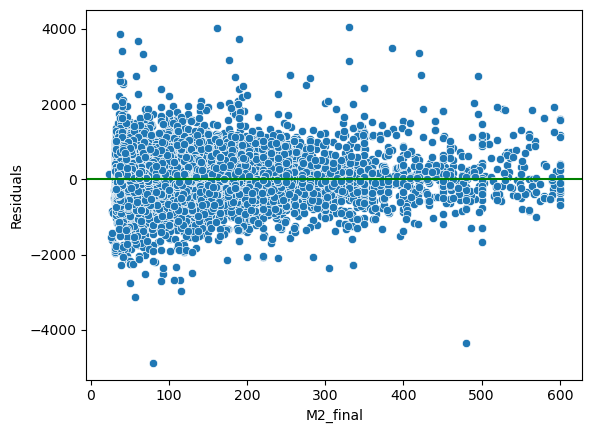

In [351]:
#Graficamos los REsiduos
residuals = model.resid

p = sns.scatterplot(data = data_modelos, x = "M2_final", y = residuals);
p.axhline(0, color = "green")
p.set(ylabel = "Residuals")
plt.show()

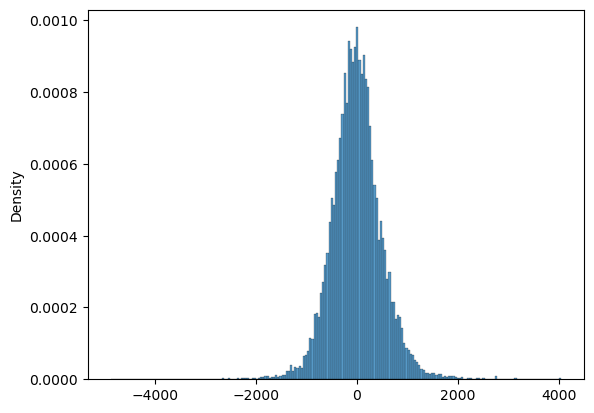

In [352]:
#Buscamos la normalidad de los REsiduos
sns.histplot(residuals, kde = False, stat = 'density', line_kws={'linewidth':5})
plt.show()

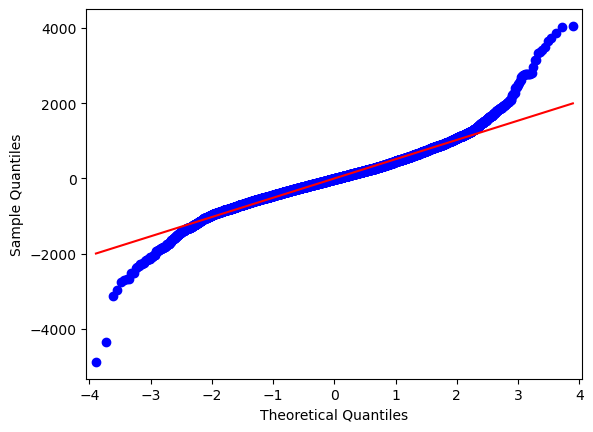

In [353]:
sm.ProbPlot(residuals).qqplot(line='s')

In [354]:
#Iniciamos Regularizacion por Lasso

#Damos una amplia gama de Alphas
alphas = np.linspace(0.001,1,1000)
#realizo el CrossValidation y entreno, buscando el mejor alpha
modelo_lasso = linear_model.LassoCV(alphas = alphas,cv=20)
model_cv = modelo_lasso.fit(X_train, y_train)

model_cv.score(X_train, y_train)


0.6695382238047825

In [355]:
#Instancio el Mejor Alpha.
mejor_alpha = model_cv.alpha_
#instancio nuevamente 
no_reg_model = sm.OLS(y_train, X_train_sm)
#Sumo regularizacion, el parametro L1 es 1 por ser lasso, sera 0 en ridge
reg_model = no_reg_model.fit_regularized(alpha = mejor_alpha, L1_wt = 1)


In [356]:
sm_prediction = reg_model.predict(X_test_sm)
eval_measures.rmse(y_test, sm_prediction)

516.9083876381656

In [357]:
# Analizo cuantos coeficientes pudimos eliminar
(reg_model.params.to_frame().sort_values(0,ascending=False)==0).sum()

0    4
dtype: int64

In [358]:
#REalizo el mismo Proceso, pero ahora con Ridge
modelo_ridge = linear_model.LassoCV(alphas = alphas,cv=5)
modelo_ridge = modelo_ridge.fit(X_train, y_train)

modelo_ridge.score(X_train, y_train)
modelo_ridge.alpha_

0.006

In [359]:
mejor_alpha_ridge = modelo_ridge.alpha_
#instancio nuevamente 
no_reg_model_ridge = sm.OLS(y_train, X_train_sm)
#Sumo regularizacion, el parametro L1 es 1 por ser lasso, sera 0 en ridge
reg_model_ridge = no_reg_model_ridge.fit_regularized(alpha = mejor_alpha_ridge, L1_wt = 0)


In [360]:
sm_prediction = reg_model_ridge.predict(X_test_sm)
eval_measures.rmse(y_test, sm_prediction)

531.6694918310282

In [361]:
#Aqui nos empeora el RMSE, lo que puede implicar un error en el proceso de REgularizacion 

In [362]:
#Buscamos si podemos mejorar el modelo utilizando nuevas columnas
data_modelos_2 = data_modelos
data_modelos_2 ['2*M2']=data_modelos_2.M2_final**2
data_modelos_2 ['3*M2']=data_modelos_2.M2_final**3


In [363]:
X_2 = data_modelos_2.drop(columns=['Precio_final_M2_USD','precio_final'])
y_2 = data_modelos_2.Precio_final_M2_USD
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.3, random_state = 10)
X_train_dummies_2 = pd.get_dummies(X_train_2,drop_first=True).reset_index(drop=True)
X_stats_2 = sm.add_constant(X_train_dummies_2)
y_train_2=y_train_2.reset_index(drop=True)
model_2 = sm.OLS(y_train_2,X_stats_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Precio_final_M2_USD   R-squared:                       0.666
Model:                             OLS   Adj. R-squared:                  0.665
Method:                  Least Squares   F-statistic:                     553.6
Date:                 Tue, 31 Aug 2021   Prob (F-statistic):               0.00
Time:                         20:20:16   Log-Likelihood:            -1.4500e+05
No. Observations:                18944   AIC:                         2.901e+05
Df Residuals:                    18875   BIC:                         2.907e+05
Df Model:                           68                                         
Covariance Type:             nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         2319.4907     66.921     34.660      0.000    2188.320    2450.661
M2_final                                        -3.1525      0.301    -10.467      0.000      -3.743      -2.562
2*M2                                             0.0052      0.001      3.517      0.000       0.002       0.008
3*M2                                          -4.53e-06   1.93e-06     -2.346      0.019   -8.31e-06   -7.45e-07
Tipo_propiedad_nuevo_COMPLEJO                  128.3912     25.961      4.946      0.000      77.506     179.276
Tipo_propiedad_nuevo_DESARROLLO INMOBILIARIO   455.3051     64.035      7.110      0.000     329.791     580.819
Tipo_propiedad_nuevo_GALPON                   -290.7430    194.780     -1.493      0.136    -672.530      91.044
Tipo_propiedad_nuevo_HOSTEL                   -511.9704    137.391     -3.726      0.000    -781.268    -242.673
Tipo_propiedad_nuevo_HOTEL                     578.8772     50.094     11.556      0.000     480.688     677.066
Tipo_propiedad_nuevo_HOUSE                    -284.0709     20.671    -13.742      0.000    -324.589    -243.553
Tipo_propiedad_nuevo_PH                       -377.5351     16.897    -22.343      0.000    -410.655    -344.416
Tipo_propiedad_nuevo_STORE                     -26.1330     18.575     -1.407      0.159     -62.541      10.275
Barrio_2_Agronomía                              21.4030    118.210      0.181      0.856    -210.299     253.105
Barrio_2_Almagro                                83.5033     68.168      1.225      0.221     -50.111     217.118
Barrio_2_Balvanera                            -159.2547     70.100     -2.272      0.023    -296.657     -21.852
Barrio_2_Barracas                             -137.5397     71.800     -1.916      0.055    -278.274       3.195
Barrio_2_Barrio Norte                          716.9138     68.592     10.452      0.000     582.467     851.361
Barrio_2_Belgrano                              847.3414     66.663     12.711      0.000     716.676     978.007
Barrio_2_Boca                                 -488.8561     78.362     -6.238      0.000    -642.453    -335.260
Barrio_2_Boedo                                 -84.6032     76.282     -1.109      0.267    -234.124      64.917
Barrio_2_Caballito                             313.0848     66.821      4.685      0.000     182.109     444.061
Barrio_2_Capital Federal                        89.8902     68.471      1.313      0.189     -44.319     224.099
Barrio_2_Catalinas                             277.3422    368.383      0.753      0.452    -444.722     999.407
Barrio_2_Centro / Microcentro                   63.3989     82.135      0.772      0.440     -97.593     224.391
Barrio_2_Chacarita   

In [364]:
#El modelo no mejora, por lo que no realizaremos este tipo de procesos

In [365]:
#Yendo especificamente al TP, utilizarmemos el Modelo que obtuvimos

In [366]:
#Obtenemos 100 inmuebles al Azar


In [367]:
enc = OneHotEncoder(drop='first')
X = data_modelos[categoricals]
enc.fit(X)
dummies = enc.transform(X).toarray()
dummies_df = pd.DataFrame(dummies)
col_names = [categoricals[i] + '_' + enc.categories_[i] for i in range(len(categoricals)) ]
col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]
dummies_df.columns = col_names_drop_first
#Aqui buscamos obtener 100 inmuebles al asar que eliminaremos del Dataset final
cien_inmuebles = data_modelos.sample(100,random_state=100)
X = pd.concat([data_modelos.M2_final,dummies_df], axis = 1)
cien_inmuebles = X.sample(100,random_state=100)
X = X.drop(cien_inmuebles.index,axis=0)
y = data_modelos.Precio_final_M2_USD
y = y.drop(cien_inmuebles.index,axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 170)
X_train_sm = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Precio_final_M2_USD   R-squared:                       0.655
Model:                             OLS   Adj. R-squared:                  0.654
Method:                  Least Squares   F-statistic:                     579.0
Date:                 Tue, 31 Aug 2021   Prob (F-statistic):               0.00
Time:                         20:20:17   Log-Likelihood:            -1.5509e+05
No. Observations:                20223   AIC:                         3.103e+05
Df Residuals:                    20156   BIC:                         3.108e+05
Df Model:                           66                                         
Covariance Type:             nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         2316.4041     63.566     36.441      0.000    2191.810    2440.998
M2_final                                        -1.7278      0.054    -32.033      0.000      -1.834      -1.622
Tipo_propiedad_nuevo_COMPLEJO                  144.3384     25.030      5.767      0.000      95.278     193.398
Tipo_propiedad_nuevo_DESARROLLO INMOBILIARIO   398.7527     61.064      6.530      0.000     279.061     518.444
Tipo_propiedad_nuevo_GALPON                   -257.3034    185.422     -1.388      0.165    -620.745     106.138
Tipo_propiedad_nuevo_HOSTEL                   -655.5563    130.424     -5.026      0.000    -911.198    -399.915
Tipo_propiedad_nuevo_HOTEL                     556.3603     49.517     11.236      0.000     459.303     653.417
Tipo_propiedad_nuevo_HOUSE                    -288.2548     20.401    -14.129      0.000    -328.243    -248.266
Tipo_propiedad_nuevo_PH                       -380.4200     16.551    -22.984      0.000    -412.862    -347.978
Tipo_propiedad_nuevo_STORE                     -35.0170     18.123     -1.932      0.053     -70.540       0.506
Barrio_2_Agronomía                             -20.2039    115.324     -0.175      0.861    -246.249     205.841
Barrio_2_Almagro                                16.2934     66.114      0.246      0.805    -113.295     145.882
Barrio_2_Balvanera                            -245.0311     68.060     -3.600      0.000    -378.435    -111.627
Barrio_2_Barracas                             -189.4298     70.252     -2.696      0.007    -327.130     -51.730
Barrio_2_Barrio Norte                          624.8606     66.522      9.393      0.000     494.472     755.249
Barrio_2_Belgrano                              769.6906     64.540     11.926      0.000     643.187     896.194
Barrio_2_Boca                                 -536.7577     75.318     -7.127      0.000    -684.387    -389.129
Barrio_2_Boedo                                -148.3574     74.147     -2.001      0.045    -293.693      -3.022
Barrio_2_Caballito                             247.8870     64.753      3.828      0.000     120.966     374.808
Barrio_2_Capital Federal                        21.9468     66.521      0.330      0.741    -108.440     152.334
Barrio_2_Catalinas                             202.3488    373.151      0.542      0.588    -529.058     933.756
Barrio_2_Centro / Microcentro                   -0.4036     79.495     -0.005      0.996    -156.220     155.413
Barrio_2_Chacarita                              28.6125     75.801      0.377      0.706    -119.964     177.189
Barrio_2_Coghlan                               329.9490     73.535      4.487      0.000     185.815     474.083
Barrio_2_Colegiales  

In [368]:
sm_prediction_train = model.predict(X_train_sm)
print(eval_measures.rmse(y_train, sm_prediction_train))

X_test_sm = sm.add_constant(X_test)
sm_prediction_test = model.predict(X_test_sm)
print(eval_measures.rmse(y_test, sm_prediction_test))
sm_prediction_test

517.9425672824572
499.9293915798267


16886    2277.876267
20751    2870.423061
25727    2581.466669
14210    2308.270108
3890     1944.211031
            ...     
15548    3025.620090
2963     5830.006005
21384    2999.702398
16116    6004.518465
18064    2106.424660
Length: 6741, dtype: float64

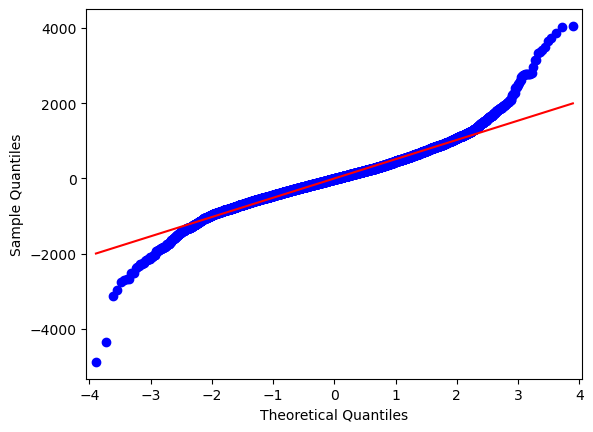

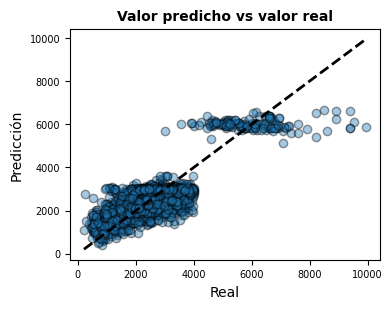

In [369]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))

axes.scatter(y_test, sm_prediction_test, edgecolors=(0, 0, 0), alpha = 0.4)
axes.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'k--', color = 'black', lw=2)
axes.set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes.set_xlabel('Real')
axes.set_ylabel('Predicción')
axes.tick_params(labelsize = 7)
plt.show()

In [370]:
#Predecimos con nuestro modelo
cien_inmuebles_sm = sm.add_constant(cien_inmuebles)
cien_inmuebles_prediction = model.predict(cien_inmuebles_sm)
cien_inmuebles_prediction

17492    2716.238669
18755    2130.614506
19047    2244.577391
25229    2415.057685
6473      910.470381
            ...     
20763    2877.334445
12609    2930.251854
1522     2015.191454
19078    1104.820782
10796    2232.246605
Length: 100, dtype: float64

In [376]:
#vamos a probar prediccion via Lasso para ver si mejora el proceso

In [377]:
#Damos una amplia gama de Alphas
alphas = np.linspace(0.001,1,1000)
#realizo el CrossValidation y entreno, buscando el mejor alpha
modelo_lasso = linear_model.LassoCV(alphas = alphas,cv=20)
model_cv = modelo_lasso.fit(X_train, y_train)

#Instancio el Mejor Alpha.
mejor_alpha = model_cv.alpha_
#instancio nuevamente 
no_reg_model = sm.OLS(y_train, X_train_sm)
#Sumo regularizacion, el parametro L1 es 1 por ser lasso, sera 0 en ridge
reg_model = no_reg_model.fit_regularized(alpha = mejor_alpha, L1_wt = 1)


In [378]:
cien_inmuebles_lasso_prediction = reg_model.predict(cien_inmuebles_sm)

cien_inmuebles_lasso_prediction

17492    2716.037886
18755    2130.860859
19047    2244.794775
25229    2415.787853
6473      911.580465
            ...     
20763    2877.120070
12609    2930.268594
1522     2020.685300
19078    1114.161189
10796    2232.844509
Length: 100, dtype: float64

In [381]:
final_Lasso = pd.concat([data_modelos.iloc[cien_inmuebles_lasso_prediction.index,4],cien_inmuebles_lasso_prediction], axis = 1)
final_Lasso.columns=['Precio_dataset','Precio_Modelo']
final_Lasso['Diferencia']=final_Lasso['Precio_Modelo'] - final_Lasso['Precio_dataset']
#final_Lasso[final_Lasso.Diferencia > 0].sort_values('Diferencia',ascending=True).sum()'''

In [382]:
final_Lasso.head()

,Precio_dataset,Precio_Modelo,Diferencia
17492,3151.79,2716.037886,-435.752114
18755,2281.25,2130.860859,-150.389141
19047,1950.98,2244.794775,293.814775
25229,2558.14,2415.787853,-142.352147
6473,583.33,911.580465,328.250465


In [384]:
data_modelos.iloc[6473]

Tipo_propiedad_nuevo           HOUSE
Barrio_2                Villa Lugano
precio_final                  140000
M2_final                         240
Precio_final_M2_USD           583.33
2*M2                           57600
3*M2                      1.3824e+07
Name: 6473, dtype: object

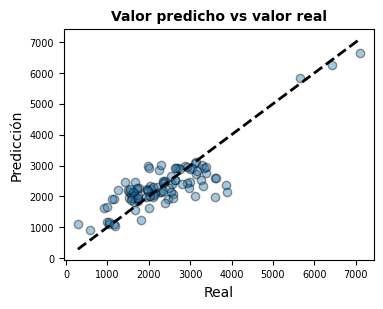

In [385]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))

axes.scatter(final_Lasso.Precio_dataset, final_Lasso.Precio_Modelo, edgecolors=(0, 0, 0), alpha = 0.4)
axes.plot([final_Lasso.Precio_dataset.min(), final_Lasso.Precio_dataset.max()], [final_Lasso.Precio_dataset.min(), final_Lasso.Precio_dataset.max()],
                'k--', color = 'black', lw=2)
axes.set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes.set_xlabel('Real')
axes.set_ylabel('Predicción')
axes.tick_params(labelsize = 7)
plt.show()

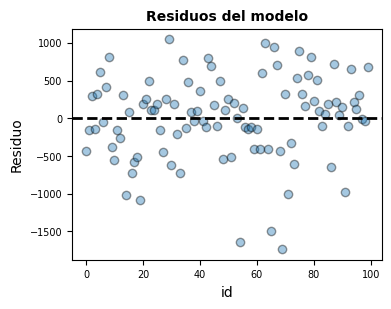

In [386]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))
axes.scatter(list(range(len(final_Lasso))), final_Lasso.Diferencia,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes.axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes.set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes.set_xlabel('id')
axes.set_ylabel('Residuo')
axes.tick_params(labelsize = 7)
plt.show()

In [387]:
final_Lasso['Diferencia'].mean()

9.259528088361286

In [390]:
casas_Sub_index= final_Lasso[final_Lasso.Diferencia > 0].sort_values('Diferencia',ascending=True).index

In [391]:
casas_a_comprar = final_Lasso[final_Lasso.Diferencia > 0].sort_values('Diferencia',ascending=True)

In [393]:
casas_a_comprar.head()

,Precio_dataset,Precio_Modelo,Diferencia
5388,2000.00,2009.529479,9.529479
265,1924.82,1963.497672,38.677672
12533,2911.39,2964.820316,53.430316
25865,2367.20,2451.238889,84.038889
7355,1027.78,1117.787095,90.007095


In [396]:
q1 = casas_a_comprar['Diferencia'].quantile(.25)
q3 = casas_a_comprar['Diferencia'].quantile(.75)
mask = casas_a_comprar['Diferencia'].between(q1, q3, inclusive=True)
iqr = casas_a_comprar.loc[mask]
iqr.head()

,Precio_dataset,Precio_Modelo,Diferencia
24666,2046.83,2226.266763,179.436763
18983,994.48,1179.293128,184.813128
5257,5646.60,5831.502261,184.902261
25256,1988.64,2180.874091,192.234091
11547,1635.71,1829.860528,194.150528


In [397]:
Inversion = data_modelos.iloc[iqr.index,0:5]
Inversion['prueba'] = Inversion.precio_final/Inversion.M2_final -Inversion.Precio_final_M2_USD
Inversion.head()

,Tipo_propiedad_nuevo,Barrio_2,precio_final,M2_final,Precio_final_M2_USD,prueba
24666,APARTMENT,Villa del Parque,163746.7,80.0,2046.83,0.003750
18983,HOUSE,Boca,180000.0,181.0,994.48,-0.004862
5257,APARTMENT,Puerto Madero,1050268.0,186.0,5646.60,0.002151
25256,APARTMENT,Almagro,175000.0,88.0,1988.64,-0.003636
11547,APARTMENT,Balvanera,229000.0,140.0,1635.71,0.004286


In [402]:
Inversion.precio_final.count()

27

In [401]:
Venta = iqr.Precio_Modelo*Inversion.M2_final
Venta.sum()

5939977.2919260645

In [400]:
Ganancia = iqr.Precio_Modelo*Inversion.M2_final - Inversion.precio_final
Ganancia.sum()

764084.8719260648